- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

PATH = "/content/drive/MyDrive/heart.csv" # Path to your file

def read_dataset(path):

    df = pd.read_csv(PATH)
    return df

#ToDo: Show histogram of dataframe

In [ ]:
df=read_dataset(PATH)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
882,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
883,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
884,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


In [ ]:
print("Quantitative columns \n")
print(df.describe())

Quantitative columns 

              age         sex          cp    trestbps        chol         fbs  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean    54.007901    0.683973    1.005643  132.117381  247.497743    0.168172   
std      9.126292    0.465186    1.024542   16.807511   47.209995    0.374230   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  212.000000    0.000000   
50%     54.000000    1.000000    1.000000  130.000000  245.000000    0.000000   
75%     60.000000    1.000000    2.000000  140.000000  274.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean     0.495485  149.492099    0.310384    1.083296    1.424379    0.714447   
std 

## Data Analysis

In [ ]:
# Data analysis
# Todo: analyze your data here
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Categorical : Sex , ChestPainType , FastingBS , RestingECG , ExerciseAngina , ST_Slope, ca , thal , HeartDiseas

In [ ]:
Features=["sex","cp","fbs","restecg","exang","slope","ca","thal","target"]
def convert_cat(Features):
  for i in Features :
    df[i]=df[i].astype("category")

convert_cat(Features)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       886 non-null    int64   
 1   sex       886 non-null    category
 2   cp        886 non-null    category
 3   trestbps  886 non-null    int64   
 4   chol      886 non-null    int64   
 5   fbs       886 non-null    category
 6   restecg   886 non-null    category
 7   thalach   886 non-null    int64   
 8   exang     886 non-null    category
 9   oldpeak   886 non-null    float64 
 10  slope     886 non-null    category
 11  ca        886 non-null    category
 12  thal      886 non-null    category
 13  target    886 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 43.9 KB


In [ ]:
continous_columns=df.describe().columns
print("Continous columns : ")
print(continous_columns)

categorical_columns=df.describe(include=["category"]).columns
print("Categorical_columns : \n",categorical_columns)

Continous columns : 
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')
Categorical_columns : 
 Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal',
       'target'],
      dtype='object')


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>, <Axes: >]], dtype=object)

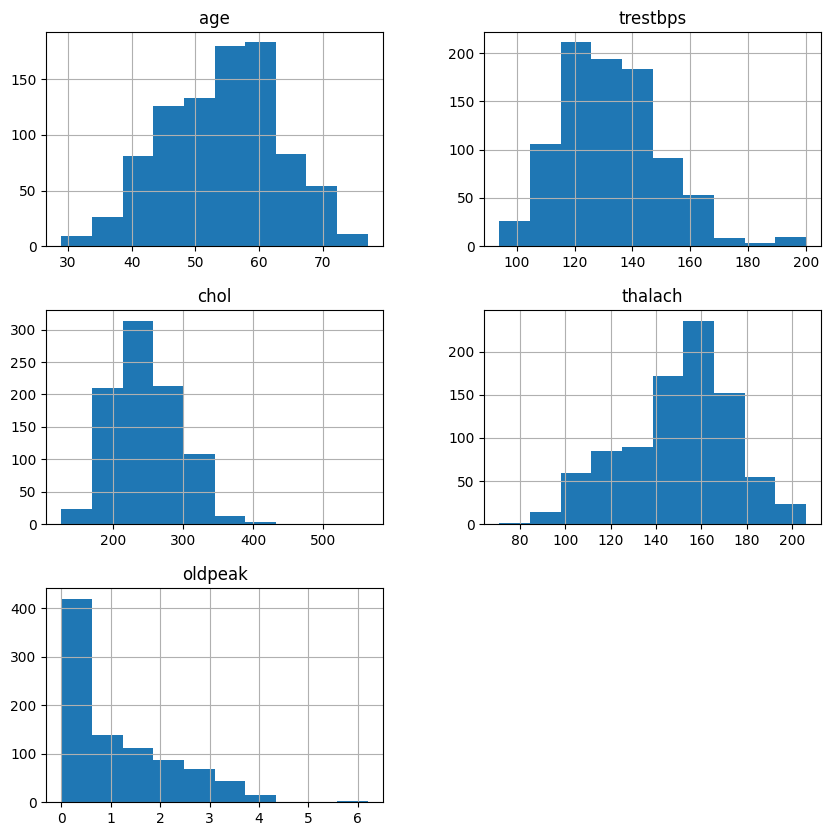

In [ ]:
df.hist(column=continous_columns,figsize=(10,10))

<Axes: xlabel='age', ylabel='Count'>

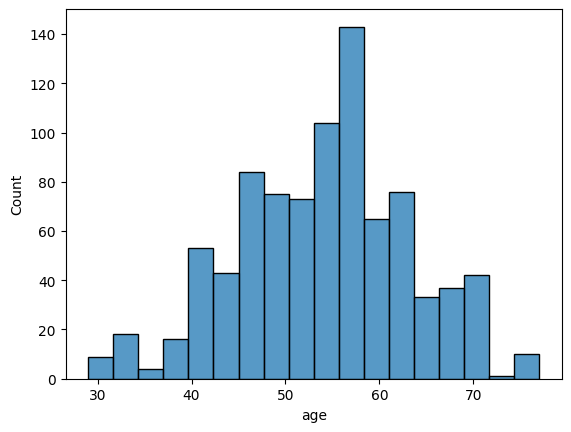

In [ ]:
sns.histplot(x="age",data=df)

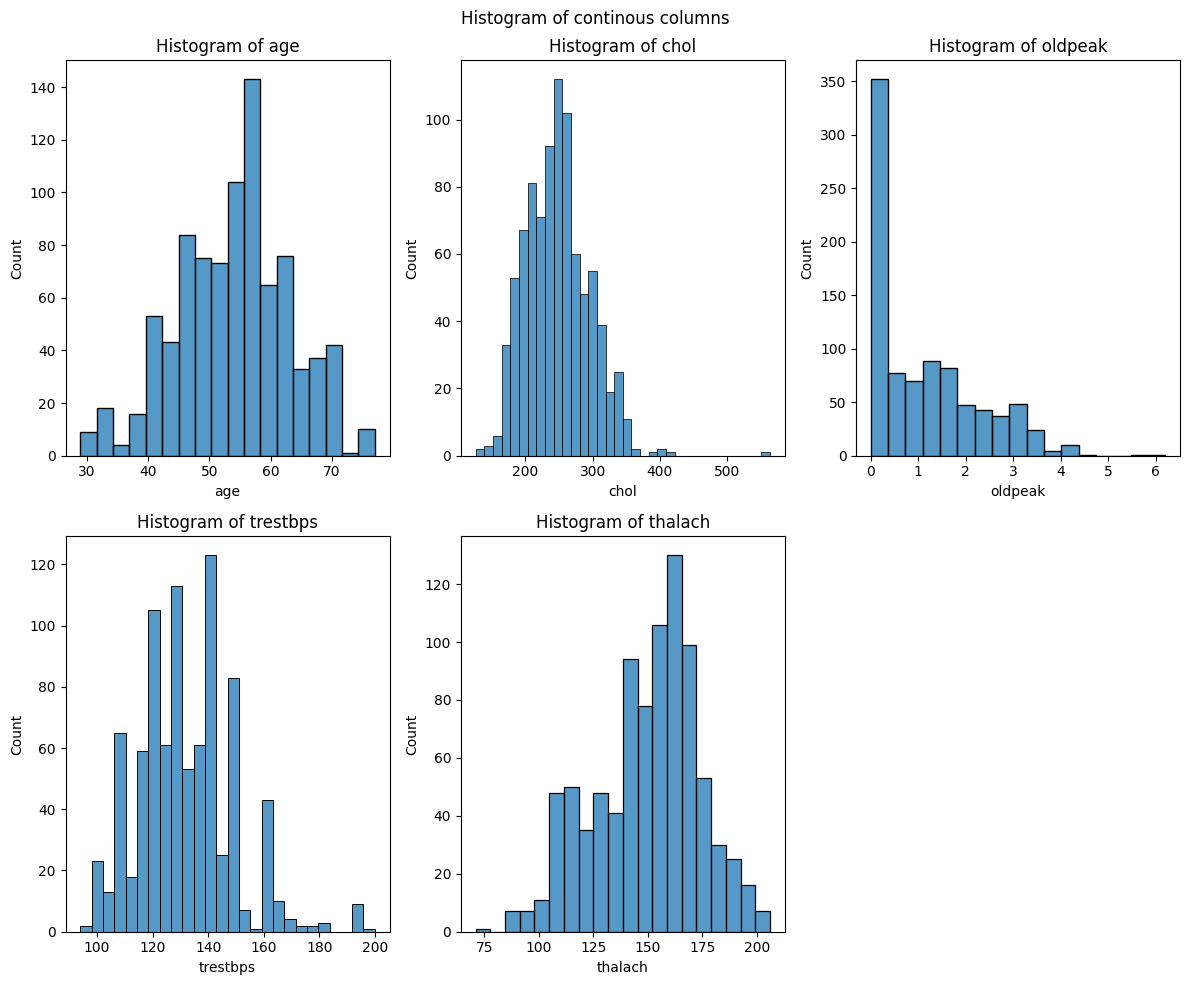

In [ ]:
def histogram_continous_columns(df,continous_columns) :
  num_hist=len(continous_columns)
  num_rows=(num_hist-1)//2
  fig,axes=plt.subplots(num_rows,3,figsize=(12,num_rows*5))
  fig.suptitle("Histogram of continous columns")
  for i,column in enumerate(continous_columns) :
    col=i // 2
    row=i % 2
    sns.histplot(data=df,x=column,ax=axes[row,col])
    axes[row,col].set_title(f"Histogram of {column}")


  axes.flat[-1].set_visible(False)
  plt.tight_layout()
  plt.show()

histogram_continous_columns(df,continous_columns)

<Axes: xlabel='count', ylabel='sex'>

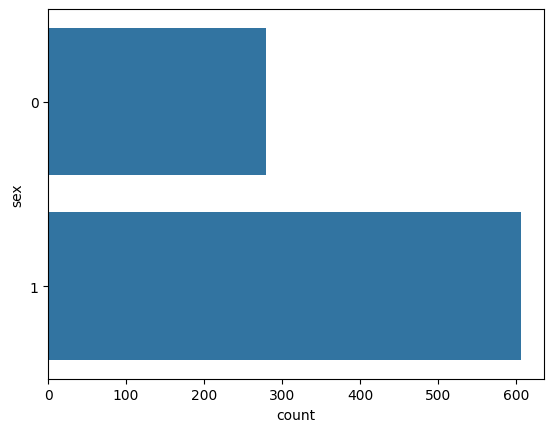

In [ ]:
sns.countplot(y="sex",data=df)

## Draw Hist For Categorical_Columns

<Axes: xlabel='count', ylabel='cp'>

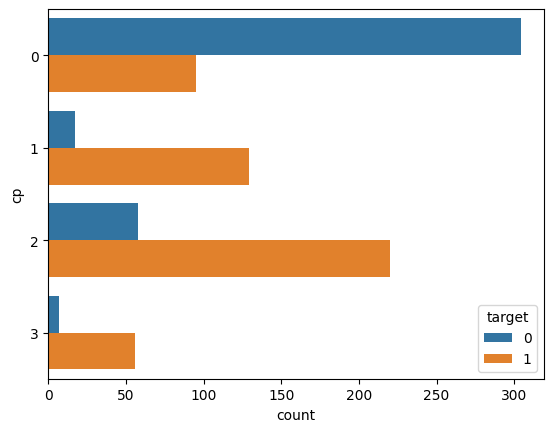

In [ ]:
sns.countplot(data=df,y="cp",hue="target")

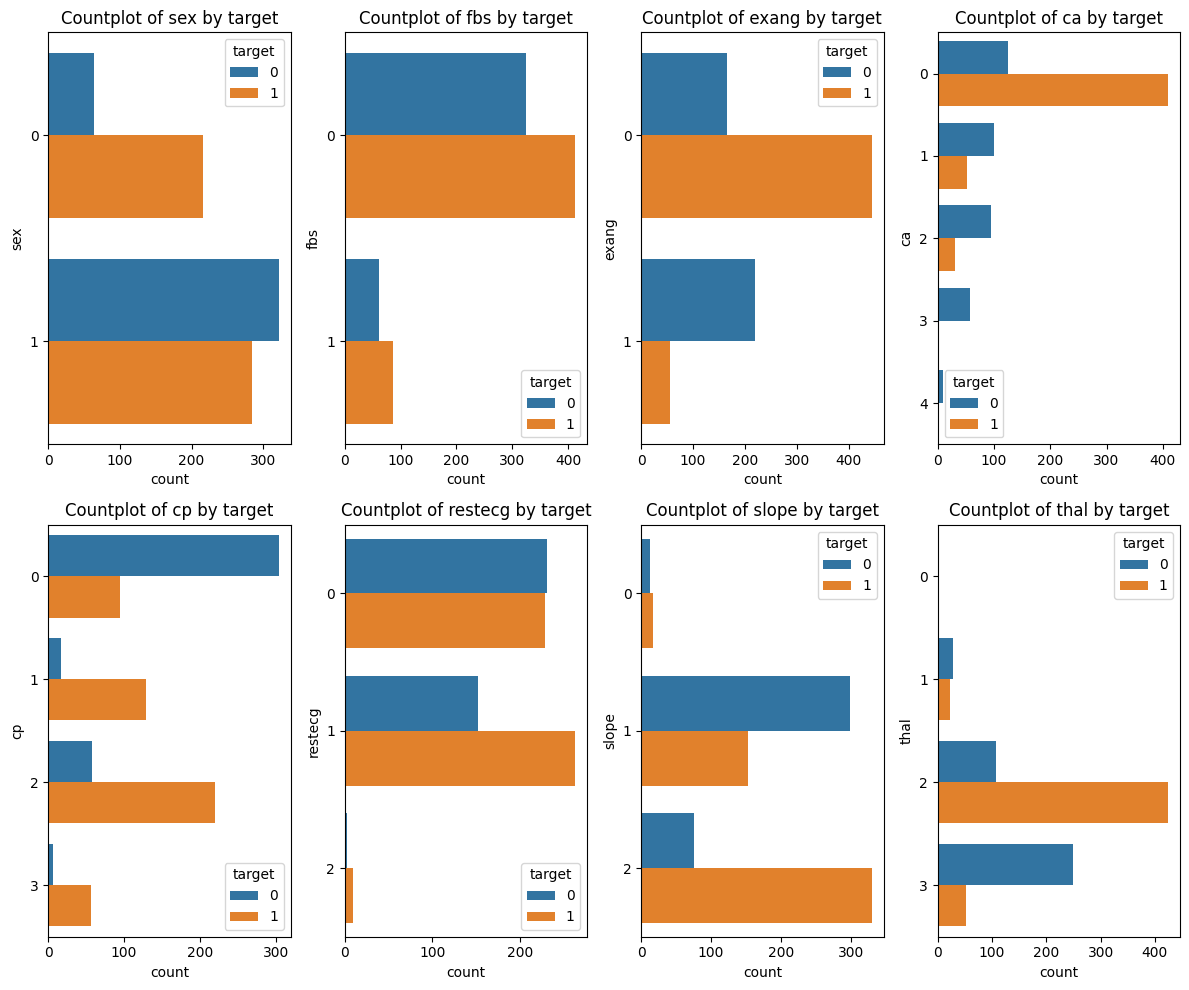

In [ ]:
def draw_hist(categorical_columns, df):
    target = categorical_columns[-1]
    cate_cols = categorical_columns.drop("target")

    num_cols = len(cate_cols)
    num_rows = (num_cols + 1) // 4

    fig, axes = plt.subplots(num_rows, 4, figsize=(12, num_rows * 5))

    for i, column in enumerate(cate_cols):
        col = i // 2
        row = i % 2
        sns.countplot(data=df, y=column, hue=target, ax=axes[row, col])
        axes[row, col].set_title(f'Countplot of {column} by {target}')

    plt.tight_layout()
    plt.show()

draw_hist(categorical_columns, df)


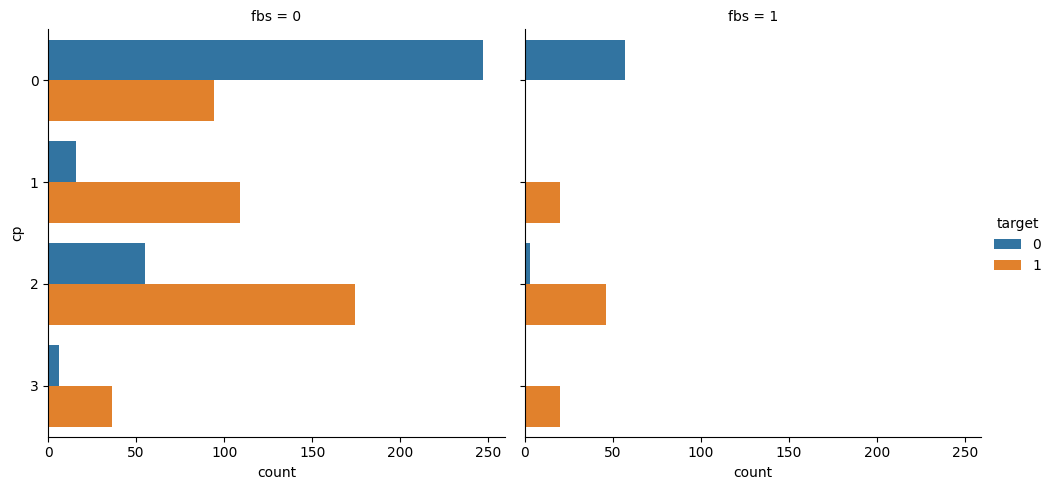

In [ ]:
sns.catplot(y="cp",data=df,hue="target",col="fbs",kind="count")

<ipython-input-16-e73fc92b4fef>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target",data=df,palette="bwr")


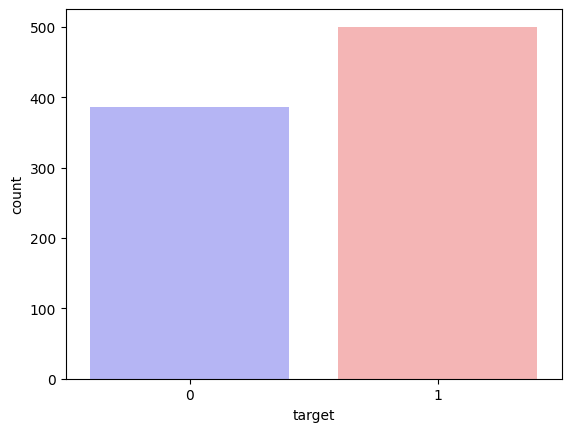

In [ ]:
sns.countplot(x="target",data=df,palette="bwr")
plt.show()

<Axes: >

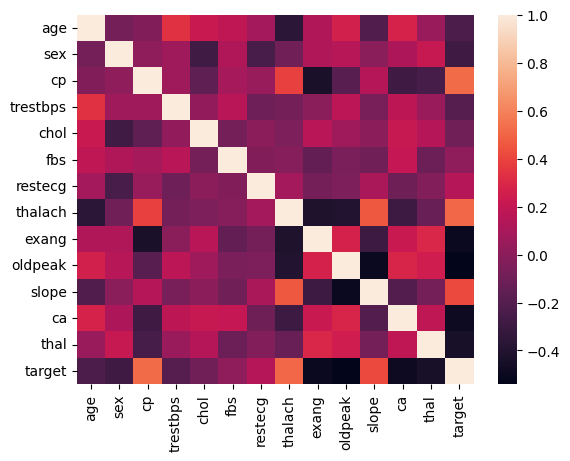

In [ ]:
sns.heatmap(df.corr())

## Preprocessing

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data

    df =df
    return df

In [ ]:
df1 = preprocessing_data(df.copy())
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
882,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
883,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
884,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


## Feature Engineering

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       886 non-null    int64   
 1   sex       886 non-null    category
 2   cp        886 non-null    category
 3   trestbps  886 non-null    int64   
 4   chol      886 non-null    int64   
 5   fbs       886 non-null    category
 6   restecg   886 non-null    category
 7   thalach   886 non-null    int64   
 8   exang     886 non-null    category
 9   oldpeak   886 non-null    float64 
 10  slope     886 non-null    category
 11  ca        886 non-null    category
 12  thal      886 non-null    category
 13  target    886 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 43.9 KB


In [ ]:
def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data

    cat_cols=[col for col in df.columns if df[col].dtype=="category"]
    cat_cols.remove("target")

    temp=pd.get_dummies(df[cat_cols])
    df.drop(cat_cols,axis=1,inplace=True)
    df=pd.concat([df,temp],axis=1)

    return df



In [ ]:
process_df = apply_feature_engineering(df1.copy())
process_df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,46,120,249,144,0.8,0,False,True,True,False,...,True,True,False,False,False,False,False,False,False,True
1,71,160,302,162,0.4,1,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
2,71,160,303,163,0.4,1,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
3,71,160,304,164,0.4,1,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
4,71,160,305,165,0.4,1,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False


In [ ]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X =df.drop("target",axis=1,inplace=False).values # Todo: Select features
    y =df["target"]  # Todo: Select label
    return X, y

X, y = prepare_X_y(process_df)

# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 2112
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    model = make_pipeline(StandardScaler(),LogisticRegression())
    # Todo: fit your model with X, y
    model.fit(X,y)

    return model

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """

    # Todo: return your error value like accuracy, f1score, ...
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm=confusion_matrix(y_true, y_pred)
    cr=classification_report(y_true , y_pred)

    print("precision :",precision )
    print("recall :",recall )
    print("accuracy :", accuracy)
    print("F1 :", f1)
    print("Confusion matrix: \n", cm)
    print("Classification report: \n", cr)


    # Todo: Only choose one of them as your score for the question 7
    main_score =f1
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)

In [ ]:
process_df

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,46,120,249,144,0.8,0,False,True,True,False,...,True,True,False,False,False,False,False,False,False,True
1,71,160,302,162,0.4,1,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
2,71,160,303,163,0.4,1,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
3,71,160,304,164,0.4,1,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
4,71,160,305,165,0.4,1,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,68,120,211,115,1.5,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
882,44,108,141,175,0.6,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
883,52,128,255,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
884,59,160,273,125,0.0,0,False,True,False,False,...,True,True,False,False,False,False,False,False,True,False


In [ ]:
testX[0]

array([57, 150, 168, 174, 1.6, False, True, False, False, True, False,
       True, False, False, True, False, True, False, False, False, True,
       True, False, False, False, False, False, False, True, False],
      dtype=object)

In [ ]:
calculate_performance(testY,pred)

precision : 0.9294871794871795
recall : 0.9477124183006536
accuracy : 0.9285714285714286
F1 : 0.9385113268608414
Confusion matrix: 
 [[102  11]
 [  8 145]]
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       113
           1       0.93      0.95      0.94       153

    accuracy                           0.93       266
   macro avg       0.93      0.93      0.93       266
weighted avg       0.93      0.93      0.93       266



0.9385113268608414

In [ ]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
      print("7. main_score =f1 \nchọn f1( sự kết hợp giữa recall và precision, độ chính xác cao và sai sót thấp ) vì ở đây false positive và false negative đều quan trọng như nhau. ")
      print("Other conclusion: Đối với bài toán này, có thể sử dụng logistic regression với solver là 'lbfgs' và penalty là 'l2', vì chúng thường được sử dụng cho các bài toán phân loại nhị phân và mang lại hiệu suất tốt. ")
      print("Ps: nếu không chọn f1 thì cũng có thể sử dụng accuracy để đánh giá bởi đây là 1 dataset khá cân bằng.")
get_conclusion()

7. main_score =f1 
chọn f1( sự kết hợp giữa recall và precision, độ chính xác cao và sai sót thấp ) vì ở đây false positive và false negative đều quan trọng như nhau. 
Other conclusion: Đối với bài toán này, có thể sử dụng logistic regression với solver là 'lbfgs' và penalty là 'l2', vì chúng thường được sử dụng cho các bài toán phân loại nhị phân và mang lại hiệu suất tốt. 
Ps: nếu không chọn f1 thì cũng có thể sử dụng accuracy để đánh giá bởi đây là 1 dataset khá cân bằng.
